
Discussion and Simulation of Vul et al 2009.
$$
\begin{align}
x_t&=x_{t-1} + v_t, \\
v_t&=\lambda v_{t-1} - kx_{t-1} + w_t,\\
w_t&= \mathcal{N}(0,\sigma_w)\\
\end{align}
\\
$$

If we make the explicit assumption that the variance of x and v do not change over an update step then we can calculate the variances according to Vul et al (2009) as.

$$
\\
\begin{align}
\sigma_x=&\sqrt{\frac{(1+\lambda)\sigma^2_w}{k(\lambda-1)(2\lambda-k-2)}}\\
\sigma_v=&\sqrt{\frac{2\sigma^2_w}{k(\lambda-1)(2\lambda-k+2)}}
\end {align}
$$

As this is a mean revering process (like the traditional ornstein uhlenbeck) the dynamics lead to a stationary process. To get an idea of what the process looks like and the time taken for it to reach a stationary distribution I have simulated a 1-d case. 

we also calculated the variances ourselves and found they differ to the ones used in the paper.

$$
\begin{align}
x_t&=x_{t-1} + v_t, \\
v_t&=\lambda v_{t-1} - kx_{t-1} + w_t,\\
\end{align}
\\
$$

As we make the assumption that the variance does not change through update step we can simply write the variance equations into the update equations.

$$
\begin{align}
x_t &=x_{t-1} + \lambda v_{t-1} - kx_{t-1} + w_t,\\
&=(1-k)x_{t-1} + \lambda v_{t-1} + w_t,\\
\sigma^2_c &= \sigma^2_a + \sigma^2_b + 2\sigma_{ab}\\
\sigma^2_x &= (1-k)^2\sigma^2_x + \lambda^2 \sigma^2_x + \sigma^2_w + 2\lambda(1-k)\sigma_{xv}\\
k(2-k)\sigma^2_x &=\lambda \sigma^2_x + \sigma^2_w + 2\lambda(1-k)\sigma_{xv}\\
\\
\\
v_t&=\lambda v_{t-1} - kx_{t-1} + w_t,\\
\sigma^2_v &= \lambda^2 \sigma^2_v +k^2 \sigma^2_x + \sigma^2_w - 2\lambda k\sigma_{xv}\\
\\
\end{align}
$$

We also make use of this assumption to compute the covariance of x and v. The computation is further simplified as $w_t$ is draw independely of $w$ and $v$ as such the covariance between them is zero, this means we do not need to compute them simplifying the number of covariance terms.

$$
\begin{align}
\sigma_{xv} &= \E[x_t,v_t] = \E[(1-k)x_{t-1} + \lambda v_{t-1} + w_t)(\lambda v_{t-1} - k x_{t-1} + w_t)],\\
&= k(k-1)\sigma^2_x + \lambda^2 \sigma^2_v + \sigma^2_w + \lambda(1-2k) \sigma_{xv}\\
(1+\lambda(2k-1))\sigma_{xv} &= k(k-1) \sigma^2_x + \lambda^2 \sigma^2_v + \sigma^2_w
\end{align}
$$

We can then solve these equations of $\sigma^2_x$, $\sigma^2_v$ by subsitition, as this is quite long to do I simply report the final results, the accuracy of these equations is proven below in simulation.

$$
\begin{align}
\sigma_x&=\sqrt{\frac{(1+\lambda)\sigma^2_w}{k(\lambda-1)(k-2\lambda-2)}}\\
\sigma_v&=\sqrt{\frac{2\sigma^2_w}{(\lambda-1)(k-2\lambda-2)}}
\end{align}
$$

to simulate dynamics give a stationary distribution, for example a fixed $\sigma_x$ or $\sigma_x$ we need to solve the variance equations above for $\sigma^2_w$ and $k$. Doing so yields.

$$
\begin{align}
k &= {\frac{( \lambda+1) \sigma^2_v}{2 \sigma^2_w}}\\
\sigma_v&=\frac{1}{2} \sqrt{\frac{\sigma^2_v(4\sigma^2_x -4 \lambda^2 \sigma^2_x - \sigma^2_v + \lambda^2 \sigma^2_v}{\sigma^2_x}}
\end{align}
$$



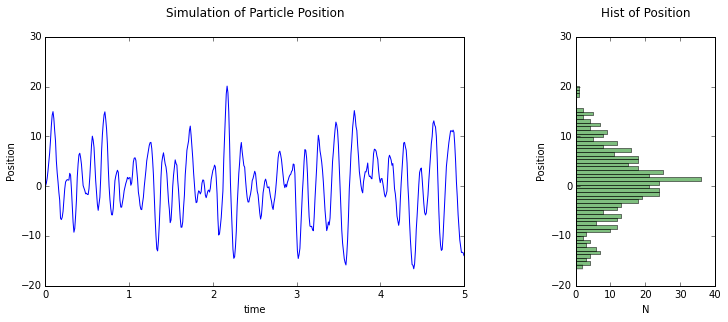

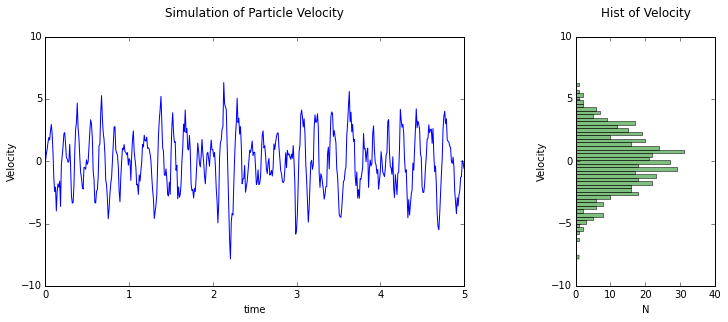

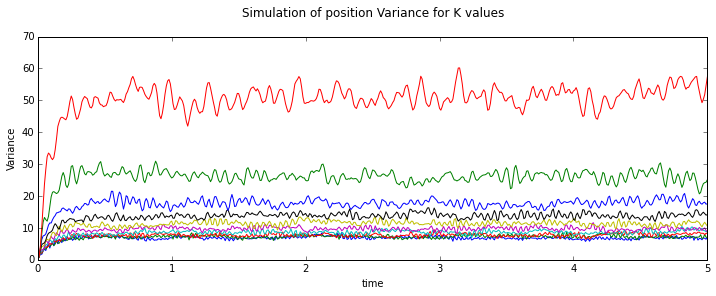

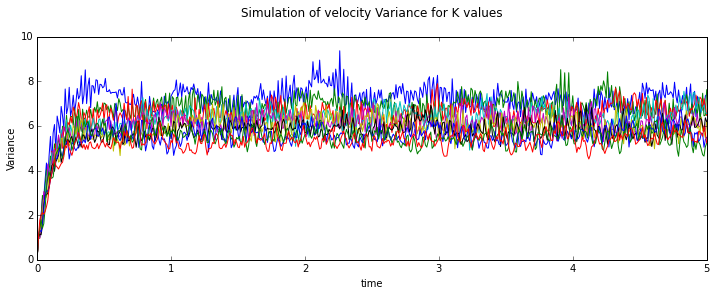

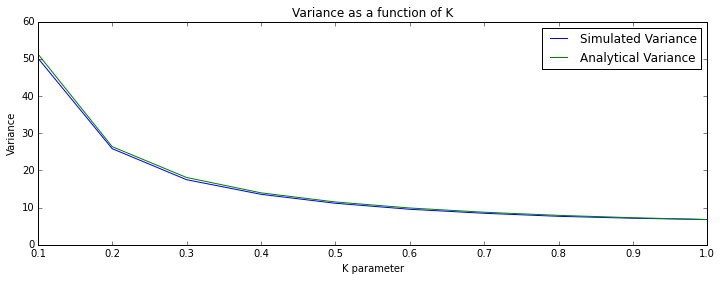

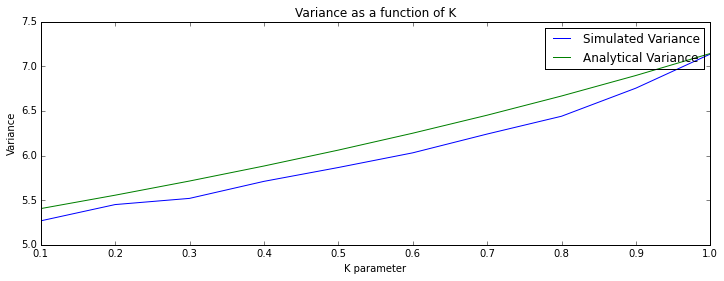

In [2]:
#@author: J Cooke


#simulation of dynamics
%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy.matlib
from matplotlib import gridspec


x0 =0
T = 5;
N = 500;
dt=1
L=0.9
K=np.linspace(1,0.1,10)
variancex=np.zeros((K.size,N+1))
variancev=np.zeros((K.size,N+1,))
x =  numpy.matlib.repmat(x0, N+1, N).astype(np.float32) ; # Array to hold the simulation
v =  numpy.matlib.repmat(x0, N+1, N).astype(np.float32) ; # Array to hold the simulation
t = np.linspace(0, T, N+1); # Array to hold times
sig=1

for j in range(K.size):
    for i in range(N):
        v[i+1,:] = L * v[i,:] - (K[j] * x[i,:])*dt + np.sqrt(dt)*np.random.normal(0,sig,N);
        x[i+1,:] = x[i,:] +  v[i+1,:];
    variancex[j,:]=np.var(x,1);
    variancev[j,:]=np.var(v,1);
                       
SigmaXHatnew=((1+L) * sig**2) / (K*(L-1) * (K-2*L-2)) #our derivation
SigmaVHatnew=2*sig**2 / ((L-1) * (K-2*L-2))

plt.figure(figsize=(12,4))
gs=gridspec.GridSpec(1, 2, width_ratios=[ 3, 1]) 
plt.subplot(gs[0])
plt.locator_params(tight=False, nbins=5)
plt.plot(t,x[:,0])
plt.title("Simulation of Particle Position\n");
plt.ylabel('Position')
plt.xlabel('time')


num_bins = 50
# the histogram of the data
plt.subplot(gs[1])
plt.locator_params(tight=False, nbins=5)
n, bins, patches = plt.hist(x[:,0], num_bins, normed=0, bottom=0, orientation=u'horizontal'
, facecolor='green', alpha=0.5)
plt.title("Hist of Position\n");
plt.ylabel('Position')
plt.xlabel('N')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(top=0.99)
plt.show()

plt.figure(figsize=(12,4))
gs=gridspec.GridSpec(1, 2, width_ratios=[ 3, 1]) 
plt.subplot(gs[0])
plt.locator_params(tight=False, nbins=5)
plt.plot(t,v[:,0])
plt.title("Simulation of Particle Velocity\n");
plt.ylabel('Velocity')
plt.xlabel('time')


num_bins = 50
# the histogram of the data
plt.subplot(gs[1])
plt.locator_params(tight=False, nbins=5)
n, bins, patches = plt.hist(v[:,0], num_bins, normed=0, bottom=0, orientation=u'horizontal'
, facecolor='green', alpha=0.5)
plt.title("Hist of Velocity\n");
plt.ylabel('Velocity')
plt.xlabel('N')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(top=0.99)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t,variancex.T)
plt.title("Simulation of position Variance for K values\n");
plt.ylabel('Variance')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t,variancev.T)
plt.title("Simulation of velocity Variance for K values\n");
plt.ylabel('Variance')
plt.xlabel('time')
plt.show()

plt.figure(figsize=(12,4))
SVariance  = plt.plot(K,np.mean(variancex,1),label='Simulated Variance')
AVariance = plt.plot(K,SigmaXHatnew, label='Analytical Variance')
plt.title("Variance as a function of K");
plt.ylabel('Variance')
plt.xlabel('K parameter')
plt.legend(['Simulated Variance','Analytical Variance'])
plt.show()


plt.figure(figsize=(12,4))
SVariance  = plt.plot(K,np.mean(variancev,1),label='Simulated Variance')
AVariance = plt.plot(K,SigmaVHatnew, label='Analytical Variance')
plt.title("Variance as a function of K");
plt.ylabel('Variance')
plt.xlabel('K parameter')
plt.legend(['Simulated Variance','Analytical Variance'])
plt.show()



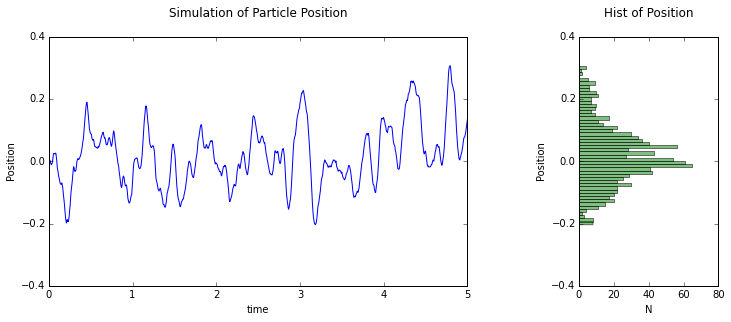

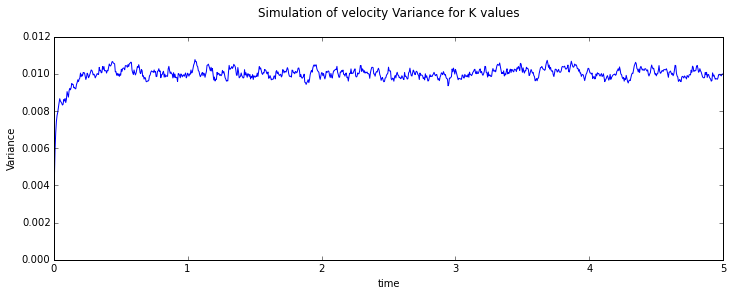

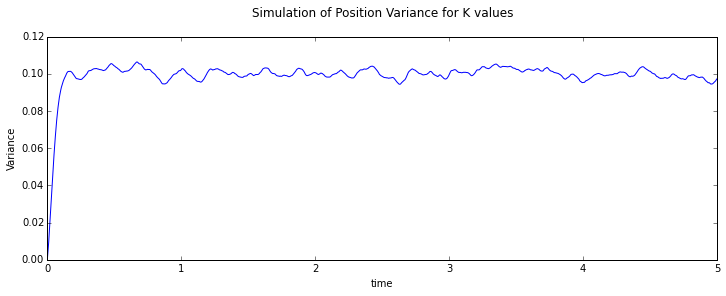

In [3]:

%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy.matlib
from matplotlib import gridspec
x0=0;
T = 5;
N = 1000;
dt=1
L=0.9
sigV=0.01
sigX=0.1
K=((L+1)*sigV**2)/(2*sigX**2)
sig=0.5*np.sqrt(sigV**2*(4*sigX**2-4*L**2*sigX**2-sigV**2+L**2*sigV**2)/sigX**2)
variancex=np.zeros((1,N+1))
variancev=np.zeros((1,N+1,))
x =  numpy.matlib.repmat(x0, N+1, N).astype(np.float32) ; # Array to hold the simulation
v =  numpy.matlib.repmat(x0, N+1, N).astype(np.float32) ; # Array to hold the simulation
t = np.linspace(0, T, N+1); # Array to hold times

for i in range(N):
    v[i+1,:] = L * v[i,:] - (K * x[i,:])*dt + np.sqrt(dt)*np.random.normal(0,sig,N);
    x[i+1,:] = x[i,:] +  v[i+1,:];
variancex[:]=np.std(x,1);
variancev[:]=np.std(v,1);
    
plt.figure(figsize=(12,4))
gs=gridspec.GridSpec(1, 2, width_ratios=[ 3, 1]) 
plt.subplot(gs[0])
plt.locator_params(tight=False, nbins=5)
plt.plot(t,x[:,0])
plt.title("Simulation of Particle Position\n");
plt.ylabel('Position')
plt.xlabel('time')


num_bins = 50
# the histogram of the data
plt.subplot(gs[1])
plt.locator_params(tight=False, nbins=5)
n, bins, patches = plt.hist(x[:,0], num_bins, normed=0, bottom=0, orientation=u'horizontal'
, facecolor='green', alpha=0.5)
plt.title("Hist of Position\n");
plt.ylabel('Position')
plt.xlabel('N')
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(top=0.99)
plt.show()

plt.figure(figsize=(12,4))
plt.plot(t,variancev.T)
plt.title("Simulation of velocity Variance for K values\n");
plt.ylabel('Variance')
plt.xlabel('time')
plt.show()


plt.figure(figsize=(12,4))
plt.plot(t,variancex.T)
plt.title("Simulation of Position Variance for K values\n");
plt.ylabel('Variance')
plt.xlabel('time')
plt.show()


Kalman Filter of dynamics

The paper implements a kalman fitler ontop of these dynamics. As the dynamics are linear and the noise is additive gaussian this makes the kalman filter optimal in the sense it provides the most precise estimate of the true position. It does this by a weighted combination of sensory feedback (position and velcoity in this case) and prediction (prior) given the parametric model provided.

to utilise a kalman filter we change the notation slightly, specifically our system can be reprented using matrix notation as 


\begin{align}
x_{t} &=  A x_{t-1} + w_t\\
\end{align}

$$ 
\mathbf{A} = 
\begin{bmatrix} 
1-k & \lambda\\
-k & \lambda 
\end{bmatrix}
$$

$$
{x} = 
\begin{bmatrix} 
x\\
v
\end{bmatrix}
$$


[[  1.89990306e-05   1.89990306e-05]
 [  1.89990306e-05   1.89990306e-05]]
(array([  3.79980612e-05,   0.00000000e+00]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))


<function matplotlib.pyplot.show>

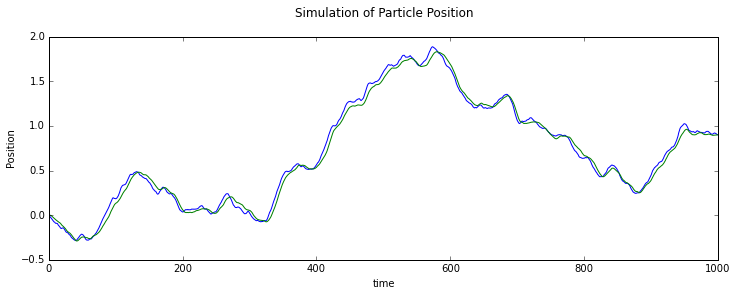

In [1]:

%matplotlib inline
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy.matlib
from matplotlib import gridspec
x0=0;
T = 5;
N = 1000;
runs=100
dt=1
L=0.9
sigV=0.01
sigX=0.7
K=((L+1)*sigV**2)/(2*sigX**2)
sig=0.5*np.sqrt(sigV**2*(4*sigX**2-4*L**2*sigX**2-sigV**2+L**2*sigV**2)/sigX**2)

xpos=np.zeros((N,runs))
#need better way to code this for higher dimensionality
A=np.array([[1-K, L] , [-K, L]])
Q=np.array([[sig**2, sig**2],[sig**2, sig**2]]).astype(np.float64)
M=np.array([[0.001, 0],[0, 0.0001]]) #diagnal covariance, so indepndent for each dimension.

print(Q)
print numpy.linalg.eig(Q)


for i in range(runs):
    x =  numpy.zeros((N, 2)).astype(np.float32) ; # Array to hold the simulation
    x[0,:] =x0
    pstate=np.zeros((1,2))
    pcov=np.zeros((2,2))
    state=np.zeros((N, 2)).astype(np.float32) 
    acov=np.zeros((2,2))
    kalGain=np.zeros((2,2))
    y=np.zeros((1,2))
    
    m= np.zeros((N,2)).astype(np.float32) #initialise measurments
    
    for t in range(0,N-1):
        
   
        
        pstate=np.dot(A,state[t,:])
        pcov=np.dot(np.dot(A,acov),A.T)+Q
        
        
        x[t+1,:] = np.dot(A,x[t,:]) + np.random.multivariate_normal([0,0],Q)
        m[t+1,:] = x[t+1,:] + np.random.multivariate_normal([0,0],M)
        
        kalGain=np.dot(pcov,np.linalg.inv(pcov+M)) #probably wrong
        y= m[t+1,:]-pstate
        
        state[t+1,:]= pstate+ np.dot(kalGain,y)
        acov=np.dot((np.eye(2)-kalGain),acov)
  
  
    xpos[:,i] = x[:,0];
            
        
        
plt.figure(figsize=(12,4))
plt.locator_params(tight=False, nbins=5)
plt.plot(x[:,0])
plt.plot(state[:,0])
plt.title("Simulation of Particle Position\n");
plt.ylabel('Position')
plt.xlabel('time')
plt.show

